2. Definição da Amostra:

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from math import *

tableData = fits.open("cosmos2015v21.fits")[1].data
#print(tableData.names)

mask = (tableData['FLAG_HJMCC'] == 0) & (tableData['FLAG_COSMOS'] == 1) & (tableData['FLAG_PETER'] == 0)

bestData = tableData[mask]

print(len(bestData))

536077


3. Correção do Avermelhamento

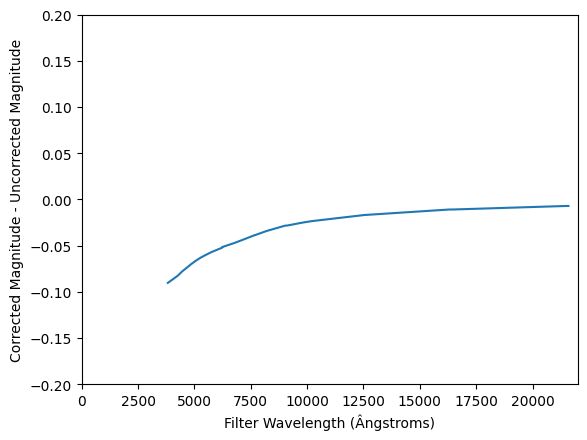

In [3]:
tableData = fits.open("cosmos2015v21.fits")[1].data
#print(tableData.names)

mask = (tableData['FLAG_HJMCC'] == 0) & (tableData['FLAG_COSMOS'] == 1) & (tableData['FLAG_PETER'] == 0)

bestData = tableData[mask]

filters = {
  "Ks": [[-0.001, 0.364], 21539.88],
  "Y": [[0.001, 1.211], 10214.19],
  "H": [[0.055, 0.563], 16453.41],
  "J": [[0.017, 0.871], 12534.65],
  "B": [[0.146, 4.020], 4458.32],
  "V": [[-0.117, 3.117], 5477.83],
  "ip": [[0.020, 1.991], 7683.88],
  "r" : [[-0.012, 2.660], 6234.11],
  "u": [[0.010, 4.660], 3823.29],
  "zp": [[-0.084, 1.461], 9036.88],
  "zpp": [[-0.084, 1.461], 9105.72],
  "IA484": [[-0.002, 3.621], 4849.20],
  "IA527": [[0.025, 3.264], 5261.13],
  "IA624": [[-0.010, 2.694], 6233.09],
  "IA679": [[-0.194, 2.430], 6781.13],
  "IA738": [[0.020, 2.150], 7361.56],
  "IA767": [[0.024, 1.996], 7684.89],
  "IB427": [[0.050, 4.260], 4263.45],
  "IB464": [[-0.014, 3.843], 4635.13],
  "IB505": [[-0.013, 3.425], 5062.51],
  "IB574": [[0.065, 2.937], 5764.76],
  "IB709": [[0.017, 2.289], 7073.63],
  "IB827": [[-0.005, 1.747], 8244.53],
  "NB711": [[0.040, 2.268], 7119.88],
  "NB816": [[-0.035, 1.787], 8149.39],
  "Hw": [[-0.031, 0.563], 16311.41],
  "Ksw": [[0.068, 0.364], 21590.44],
  "yHSC": [[-0.014, 1.298], 9779.93]
}

for i in range(100):
    for j in range(len(bestData[i])):
        if "MAG_AUTO" in bestData.names[j]:
            sf, fx = filters[bestData.names[j].split("_")[0]][0]
            mag_corrected = bestData[i][j] - bestData[i][11] * fx
            
            filters[bestData.names[j].split("_")[0]].append(mag_corrected - bestData[i][j])
            
            bestData[i][j] = mag_corrected

orderedList = sorted(filters.items(), key = lambda x: x[1][1])

x = []
y = []

for i in range(len(orderedList)):
    x.append(orderedList[i][1][1])
    #'a' pode ser um número qualquer entre 2 e 101
    a = 58
    y.append(orderedList[i][1][a])


plt.plot(x, y)

plt.xlabel("Filter Wavelength (Ângstroms)")
plt.ylabel("Corrected Magnitude - Uncorrected Magnitude")

plt.ylim(-0.20, 0.20)
plt.xlim(0, 22000)

plt.show()

Observação: A curva do gráfico ficou bem turbulenta, algo inesperado levando em consideração a natureza do avermelhamento. Porém se retirarmos o fator 'sf' da equação, a turbulência some e o gráfico fica com a forma esperada.

4.1. Calculadora de redshift: Mude os valores no próprio código, antes do breakpoint.

In [8]:
z = 3  # redshift


H0 = 70 # Hubble constant
WM = 0.3 # Omega(matter)
WV = 0.7 # Omega(vacuum) or lambda

# initialize constants

WR = 0.        # Omega(radiation)
WK = 0.        # Omega curvaturve = 1-Omega(total)
c = 299792.458 # velocity of light in km/sec
Tyr = 977.8    # coefficent for converting 1/H into Gyr
DTT = 0.5      # time from z to now in units of 1/H0
DTT_Gyr = 0.0  # value of DTT in Gyr
age = 0.5      # age of Universe in units of 1/H0
age_Gyr = 0.0  # value of age in Gyr
zage = 0.1     # age of Universe at redshift z in units of 1/H0
zage_Gyr = 0.0 # value of zage in Gyr
DCMR = 0.0     # comoving radial distance in units of c/H0
DCMR_Mpc = 0.0 
DCMR_Gyr = 0.0
DA = 0.0       # angular size distance
DA_Mpc = 0.0
DA_Gyr = 0.0
kpc_DA = 0.0
DL = 0.0       # luminosity distance
DL_Mpc = 0.0
DL_Gyr = 0.0   # DL in units of billions of light years
V_Gpc = 0.0
a = 1.0        # 1/(1+z), the scale factor of the Universe
az = 0.5       # 1/(1+z(object))

h = H0/100.
WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
WK = 1-WM-WR-WV
az = 1.0/(1+1.0*z)
age = 0.
n=1000         # number of points in integrals
for i in range(n):
  a = az*(i+0.5)/n
  adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
  age = age + 1./adot

zage = az*age/n
zage_Gyr = (Tyr/H0)*zage
DTT = 0.0
DCMR = 0.0

# do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
for i in range(n):
  a = az+(1-az)*(i+0.5)/n
  adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
  DTT = DTT + 1./adot
  DCMR = DCMR + 1./(a*adot)

DTT = (1.-az)*DTT/n
DCMR = (1.-az)*DCMR/n
age = DTT+zage
age_Gyr = age*(Tyr/H0)
DTT_Gyr = (Tyr/H0)*DTT
DCMR_Gyr = (Tyr/H0)*DCMR
DCMR_Mpc = (c/H0)*DCMR

# tangential comoving distance

ratio = 1.00
x = sqrt(abs(WK))*DCMR
if x > 0.1:
  if WK > 0:
    ratio =  0.5*(exp(x)-exp(-x))/x 
  else:
    ratio = sin(x)/x
else:
  y = x*x
  if WK < 0: y = -y
  ratio = 1. + y/6. + y*y/120.
DCMT = ratio*DCMR
DA = az*DCMT
DA_Mpc = (c/H0)*DA
kpc_DA = DA_Mpc/206.264806
DA_Gyr = (Tyr/H0)*DA
DL = DA/(az*az)
DL_Mpc = (c/H0)*DL
DL_Gyr = (Tyr/H0)*DL

# comoving volume computation

ratio = 1.00
x = sqrt(abs(WK))*DCMR
if x > 0.1:
  if WK > 0:
    ratio = (0.125*(exp(2.*x)-exp(-2.*x))-x/2.)/(x*x*x/3.)
  else:
    ratio = (x/2. - sin(2.*x)/4.)/(x*x*x/3.)
else:
  y = x*x
  if WK < 0: y = -y
  ratio = 1. + y/5. + (2./105.)*y*y
VCM = ratio*DCMR*DCMR*DCMR/3.
V_Gpc = 4.*pi*((0.001*c/H0)**3)*VCM

print('For H_o = ' + '%1.1f' % H0 + ', Omega_M = ' + '%1.2f' % WM + ', Omega_vac = ',
'%1.2f' % WV + ', z = ' + '%1.3f' % z,
'It is now ' + '%1.1f' % age_Gyr + ' Gyr since the Big Bang.',
'The age at redshift z was ' + '%1.1f' % zage_Gyr + ' Gyr.',
'The light travel time was ' + '%1.1f' % DTT_Gyr + ' Gyr.',
'The comoving radial distance, which goes into Hubbles law, is',
'%1.1f' % DCMR_Mpc + ' Mpc or ' + '%1.1f' % DCMR_Gyr + ' Gly.',
'The comoving volume within redshift z is ' + '%1.1f' % V_Gpc + ' Gpc^3.',
'The angular size distance D_A is ' + '%1.1f' % DA_Mpc + ' Mpc or',
'%1.1f' % DA_Gyr + ' Gly.',
'This gives a scale of ' + '%.2f' % kpc_DA + ' kpc/".',
'The luminosity distance D_L is ' + '%1.1f' % DL_Mpc + ' Mpc or ' + '%1.1f' % DL_Gyr + ' Gly.',
'The distance modulus, m-M, is '+'%1.2f' % (5*log10(DL_Mpc*1e6)-5))

For H_o = 70.0, Omega_M = 0.30, Omega_vac =  0.70, z = 3.000 It is now 13.5 Gyr since the Big Bang. The age at redshift z was 2.1 Gyr. The light travel time was 11.4 Gyr. The comoving radial distance, which goes into Hubbles law, is 6354.5 Mpc or 20.7 Gly. The comoving volume within redshift z is 1074.8 Gpc^3. The angular size distance D_A is 1588.6 Mpc or 5.2 Gly. This gives a scale of 7.70 kpc/". The luminosity distance D_L is 25417.2 Mpc or 82.9 Gly. The distance modulus, m-M, is 47.03


4.2. Atividade a)

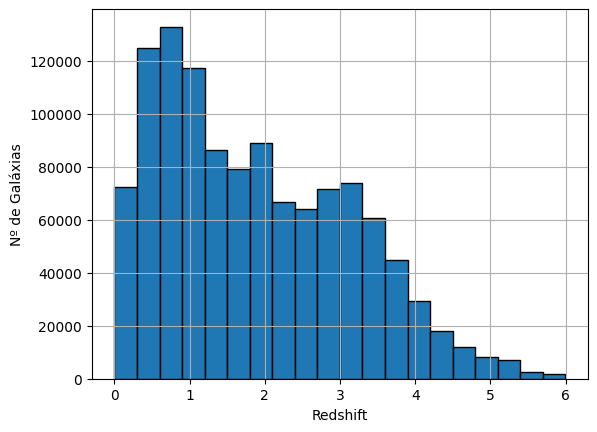

Valores: 
Mínimo: 0.0025 
Máximo: 5.995 
Quartis: 0.8158000111579895 1.6818000078201294 2.8657000064849854


In [4]:
mask = (tableData['ZPDF'] > 0)

bestData = tableData[mask]

redshifts = []

for i in range(len(bestData)):
    redshifts.append(bestData[i]['ZPDF'])

plt.hist(redshifts, bins=20, edgecolor = 'black', linewidth = 1)
plt.xlabel('Redshift')
plt.ylabel('Nº de Galáxias')
plt.grid()
plt.show()


print('Valores:', '\nMínimo:', min(redshifts), '\nMáximo:', max(redshifts), '\nQuartis:', np.quantile(redshifts, .25), np.quantile(redshifts, .5), np.quantile(redshifts, .75))


Atividade b)

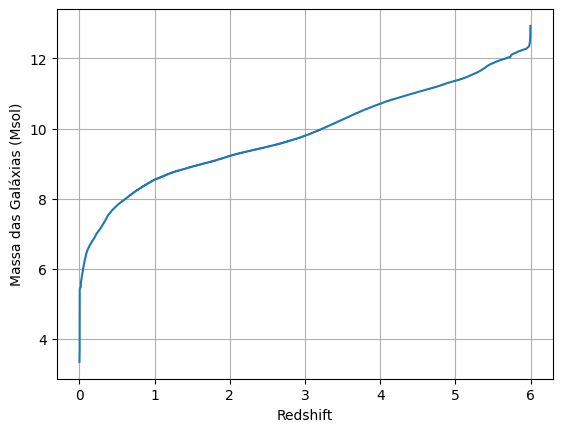

In [6]:
tableData = fits.open("cosmos2015v21.fits")[1].data
#print(tableData.names)

mask = (tableData['ZPDF'] > 0) & (tableData['mass_best'] > 0)

bestData = tableData[mask]

redshifts = []
massas = []

for i in range(len(bestData)):
    redshifts.append(bestData[i]['ZPDF'])
    massas.append(bestData[i]['mass_best'])

redshifts = sorted(redshifts)
massas = sorted(massas)

plt.plot(redshifts, massas)
plt.xlabel('Redshift')
plt.ylabel('Massa das Galáxias (Msol)')
plt.grid()
plt.show()

Atividades c) e d)

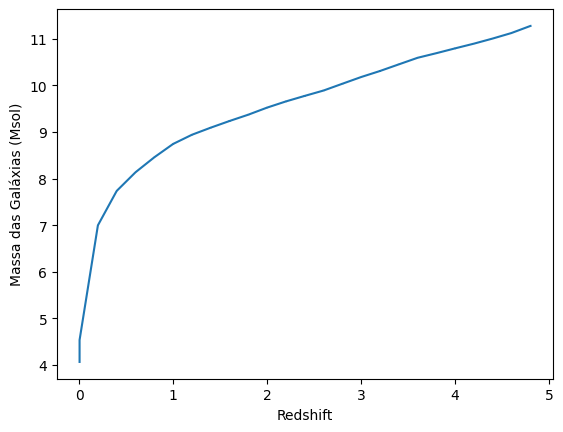

In [11]:
mask = (tableData['FLAG_HJMCC'] == 0) & (tableData['FLAG_COSMOS'] == 1) & (tableData['FLAG_PETER'] == 0) & (tableData['ZPDF'] > 0) & (tableData['mass_best'] > 0) & (tableData['ZPDF'] < 5) 

bestData = tableData[mask]

redshifts1 = []
masses = []

for i in range(len(bestData)):
    redshifts1.append(bestData[i]['ZPDF'])
    masses.append(bestData[i]['mass_best'])

redshifts1 = sorted(redshifts1)
masses = sorted(masses)
zippedList = list(zip(redshifts, masses))

m = 0
newMasses = []
newRedshifts = []

for i in range(25):
    m += 0.2
    thisList = []
    for j in range(len(zippedList)):
        if zippedList[j][0] > m or zippedList[j][0] < m-0.2:
            continue
        thisList.append(zippedList[j])
    
    for k in [0, 2, 4, 9]:
        newMasses.append(thisList[k][1])
        newRedshifts.append(thisList[k][0])
        
newMasses = sorted(newMasses)
newRedshifts = sorted(newRedshifts)

plt.plot(newRedshifts, newMasses)
plt.xlabel('Redshift')
plt.ylabel('Massa das Galáxias (Msol)')
plt.grid()
plt.show()

Atividade e)

O resultado é completamente o oposto das minhas expectativas iniciais. Eu esperava que a massa das galáxias diminuísse conforme o redshift aumentasse, então isso é simplesmente surpreendente. Imagino que possa ser algum viés ou distorção nos dados.